# Upcoming Features
> This page is updated in real time

> I'm currently writing my thesis so updates may be sporadic

This is a feature testing notebook which contains code before it is tested and added to the library's other notebooks. This is a real-time look at what's under development - this page changes with every commit to the github repo.

In [1]:
# new measures

from inspect import getmembers, isfunction
import gamba as gb, pandas as pd, random
import datetime

# make porting over a little easier
check_measure_data = gb.measures.check_measure_data
get_sessions = gb.measures.get_sessions
aggregate_bets = gb.measures.aggregate_bets


def generate_bets(n=20):
    df = pd.DataFrame()
    
    df['player_id'] = [1] * n
    df['bet_size'] = [random.randint(0,20) for _ in range(n)]
    df['bet_time'] = [datetime.datetime.now() + random.random() * datetime.timedelta(days=500) for _ in range(n)]
    df['payout_size'] = [bet * 2 if (random.random() < 0.5) else 0 for bet in df['bet_size'] ]
    
    df['payout_time'] = [bet_time + random.random() * datetime.timedelta(minutes=1) for bet_time in df['bet_time']]
    df['decimal_odds'] = [2.0] * n
    
    return df
    

player_bets = generate_bets()

functions = getmembers(gb.measures, isfunction)

display(player_bets.head())
print(functions)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


,player_id,bet_size,bet_time,payout_size,payout_time,decimal_odds
0,1,19,2022-07-28 10:16:18.420458,38,2022-07-28 10:17:02.423591,2.0
1,1,4,2022-01-08 06:11:32.591243,0,2022-01-08 06:12:20.474972,2.0
2,1,9,2022-05-20 01:48:35.387337,18,2022-05-20 01:49:15.730706,2.0
3,1,17,2021-12-11 09:12:44.650649,34,2021-12-11 09:12:57.668124,2.0
4,1,8,2022-05-11 16:21:21.756946,16,2022-05-11 16:21:34.148072,2.0


[('aggregate_bets', <function aggregate_bets at 0x7fd3ddee30d0>), ('available_measures', <function available_measures at 0x7fd3ddee2dc0>), ('calculate_braverman_measures', <function calculate_braverman_measures at 0x7fd3ddee2d30>), ('calculate_labrie_measures', <function calculate_labrie_measures at 0x7fd3de5fbca0>), ('check_measure_data', <function check_measure_data at 0x7fd3ddee2e50>), ('create_measures_table', <function create_measures_table at 0x7fd3e404b820>), ('duration', <function duration at 0x7fd3e404b8b0>), ('frequency', <function frequency at 0x7fd3e404b940>), ('frequency_raw', <function frequency_raw at 0x7fd3e404baf0>), ('get_sessions', <function get_sessions at 0x7fd3ddee2ee0>), ('intensity', <function intensity at 0x7fd3e404ba60>), ('max_bet_size', <function max_bet_size at 0x7fd3de5fb820>), ('mean_bet_size', <function mean_bet_size at 0x7fd3e404a0d0>), ('mean_bets_per_day', <function mean_bets_per_day at 0x7fd3e404be50>), ('mean_game_types_per_day', <function mean_game

## Systematic Review Measures

In [61]:
def active_day_trajectory(player_bets):
    
    pass

5


In [12]:



sawtooth_occurances(player_bets)

3


## Generic Utility Methods

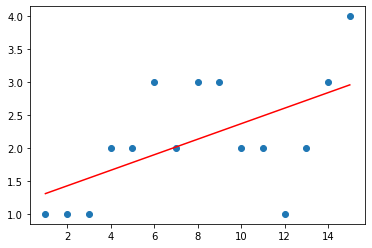

0.11785714285714284

In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, numpy as np
def aggregate_trajectory(player_bets, aggregation='daily', plot=False, variable='bet_size'):
    
    "Gradient of a linear regression fitted to the sequence of an aggregated behavioural measure. Aggregation level can be daily, weekly, or monthly."
    
    check_measures_data(player_bets, [variable])
    
    bets = aggregate_bets(player_bets, aggregation=aggregation)
    aggregates = [df[variable].sum() for df in bets]
    
    x = np.array(range(len(aggregates))).reshape((-1, 1)) + 1
    y = aggregates

    model = LinearRegression().fit(x, y)

    model_x = x
    model_y = model.coef_ * x + model.intercept_

    if plot:
        plt.figure()
        plt.scatter(x, y)
        plt.plot(model_x, model_y, color="r")
        plt.ylabel(variable + ' sum')
        plt.show()

    return model.coef_[0]


generic_trajectory([1,1,1,2,2,3,2,3,3,2,2,1,2,3,4], plot=True)

[[-0.75168546]
 [ 0.02466512]
 [ 1.65049313]
 [ 2.21787761]
 [-0.85616189]
 [-0.59038019]
 [ 4.21257287]
 [ 5.54031505]
 [ 4.84723228]
 [ 4.13853174]
 [ 6.70278679]
 [ 3.72489653]
 [ 4.33384287]
 [ 4.56100066]
 [ 3.88145772]
 [ 4.41494691]
 [ 6.29808589]
 [ 4.35027806]
 [ 4.58080839]
 [ 6.56074725]]


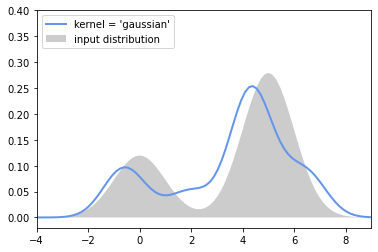

In [4]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

print(X)

X_plot = np.linspace(-5, 10, 100)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
lw = 2

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax.plot(X_plot[:, 0], np.exp(log_dens), color='cornflowerblue', lw=lw,
        linestyle='-', label="kernel = '{0}'".format('gaussian'))

ax.legend(loc='upper left')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()


In [ ]:
def total_wagered_trajectory(player_bets, aggregation='daily', plot=False):
    
    return aggregate_trajectory(player_bets, aggregation=aggregation, plot=plot, variable='bet_size')

total_wagered_trajectory(player_bets, aggregation = 'monthly', plot=True)

## General Improvements

In [7]:
# new techniques

# the neural networks used in the Philander 2014 replication need better documentation and parameterisation